<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_abril_2020/blob/master/02_Mahotas_fracionado_B_avalia_mar_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 9.2MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4265661 sha256=f3d99439900120f03a3e4e0b77dda624fb7b0f407bddc40a1ab1369247e8e9f6
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
# fotos pequenas 
# 02_Mahotas_fracionado_B_mar_03_2020.ipynb 
# fotos grandes
# 02_Mahotas_fracionado_A_mar_03_2020.ipynb

In [0]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']
Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy import integrate
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 223 (delta 33), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (223/223), 87.41 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/marquesgabi_fev_2020/Doutorado


In [0]:

Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos9Amostras720.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

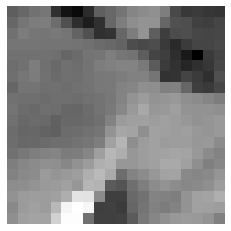

In [9]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
NumFotos=len(img_name)

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
# ESTA PARTE PRECISA PARA CALCULAR OS PICOS E AREA ABAIXO DA CURVA, CADA
# LINHA E UMA CURVA DA PROPRIEDADE ESCOLHIDA PARA UMA FOTO E CADA COLUNA 
# UM QUADRADO DA FOTO ANDANDO...
Todas_Fotos=[] 
# Todas_Fotos tem os valores medio da propriedade cada linha representa 
# uma foto e cada coluna as subdivisoes da foto (um quadrado que anda ao 
# longo da foto)
for k in range(NumFotos):
  Prop_Escolhida=[]
  #p_foto=ww[k,:].reshape(Size,Size)
  p_foto=ww[k].reshape(Size,Size)
  GLCM=[]
  glcm_haralick=[]
  x_ref=[]
  Count=Sub_Size
  p=np.zeros((Sub_Size,Sub_Size))
  j_ref=0
  Cada_foto=[]
  Posicao_X=[]
  Posicao_Y=[]
  for k in range(Size):
    if((k+Sub_Size-1)<Size):
      #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
      for i in range(Sub_Size):
        Posicao_X.append(Crop+i)
        for j in range(Sub_Size):
          p[i,j]=p_foto[Crop+i,j+k]
          Posicao_Y.append(j+k)

      WW=np.copy(p) 
      Cada_foto.append(WW.ravel())
      x_ref.append(Count-Sub_Size)
      Count=Count+1
     
      Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Escolha)
      Prop_Escolhida.append(Mahotas[Prop].mean())

  Todas_Fotos.append(Prop_Escolhida)

df=pd.DataFrame(Todas_Fotos)



In [13]:
print(df)

              0            1           2   ...          14          15           16
0     289.777778   253.722222  282.965278  ...   58.423611   77.819444    62.166667
1     280.250000   140.520833   36.500000  ...   43.722222   46.013889    53.847222
2      61.888889    55.472222   46.937500  ...  206.416667  265.451389   458.125000
3    1618.798611  1373.083333  775.562500  ...  267.527778  608.069444   622.652778
4      93.312500    63.951389   11.368056  ...  317.256944  316.034722   229.923611
..           ...          ...         ...  ...         ...         ...          ...
715   147.111111    10.034722   12.361111  ...  313.284722  762.381944  1372.465278
716   261.347222   287.013889  161.187500  ...   50.145833  133.520833   268.055556
717    62.291667    40.458333   33.527778  ...   33.180556   25.229167    15.722222
718    63.986111    43.104167   24.840278  ...  178.347222  127.006944  8161.145833
719  1495.173611  1279.555556  743.333333  ...   79.256944  486.138889  1246

In [14]:
print(len(Cada_foto[0])) # Cada_foto contem a foto pequena varrida
print(np.array(Cada_foto).shape)

16
(17, 16)


In [15]:
print(NumFotos)

720


In [0]:
# esta parte calcula picos, area abaixo da curva antes ela precisa gerar 
# o dataframe que contem a propriedade escolhida com uma foto em cada linha ....
Features_Total=[]
for i in range(NumFotos):
  x=df.iloc[i]
  peaks, rr = find_peaks(x, height=0)

  N_peaks=len(peaks)
  prominences = peak_prominences(x, peaks)
  
  #Area = simps(x, dx=1)
  Area = integrate.simps(x, dx=1)
  if(len(peaks)==0):
    Width_peaks =0
    Width_peaks_max =0
    Width_peaks_min =0
    Media_proem=0    
  else:
    Width_peaks =np.mean(peak_widths(x, peaks, rel_height=0.5))
    Width_peaks_max =np.max(peak_widths(x, peaks, rel_height=0.5))
    Width_peaks_min =np.min(peak_widths(x, peaks, rel_height=0.5))
    Media_proem=np.mean(prominences)
  Median = np.median(x)
  Mode= stats.mode(x)[0]
  Mean=np.mean(x)
  Sd=np.std(x)

  Features=[]
  Features.append(N_peaks)
  Features.append(Media_proem )
  Features.append(Area)
  Features.append(Width_peaks )
  Features.append(Width_peaks_max)
  Features.append(Width_peaks_min)
  Features.append(Median )
  Features.append(Mode[0])
  Features.append(Mean)
  Features.append(Sd)

  Features_Total.append(Features)

Nomes_Fracionada=['N_peaks','Media_proem','Area','Width_peaks','Width_peaks_max',
                    'Width_peaks_min','Median','Mode','Mean','Sd'] 
  
Features_Total=pd.DataFrame(Features_Total,columns=Nomes_Fracionada)


In [17]:
print(Features_Total)

     N_peaks  Media_proem         Area  ...       Mode        Mean           Sd
0          2    13.649306  1407.703704  ...   7.527778   93.163399   101.417987
1          2   268.502315  6954.069444  ...  36.375000  402.455882   374.616672
2          2    16.582176  2372.189815  ...  46.937500  154.894608   109.031011
3          2     6.756944  5663.775463  ...  77.493056  397.558007   451.881212
4          3    25.916667  1681.699074  ...  10.229167  108.011438    94.422902
..       ...          ...          ...  ...        ...         ...          ...
715        2     2.827546  2325.761574  ...  10.034722  185.276144   346.456982
716        2    10.042824  1243.384259  ...   8.180556   88.034314    95.038247
717        3    12.634259   466.212963  ...   6.069444   29.092729    21.045419
718        2    21.590278  4145.969907  ...  24.840278  563.948121  1900.115260
719        0     0.000000  5489.270833  ...  19.201389  405.430964   487.975019

[720 rows x 10 columns]


In [18]:
# found drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [19]:
print(Features_Total.iloc[92])


N_peaks               2.000000
Media_proem         112.196759
Area               7345.708333
Width_peaks         124.182847
Width_peaks_max     496.218750
Width_peaks_min       2.704120
Median              539.111111
Mode                 26.979167
Mean                450.913807
Sd                  208.849337
Name: 92, dtype: float64


In [20]:

print(Features_Total.iloc[520])

N_peaks               2.000000
Media_proem          25.549769
Area               1040.918981
Width_peaks          18.287807
Width_peaks_max      67.666667
Width_peaks_min       2.905374
Median               46.965278
Mode                 11.236111
Mean                 67.365605
Sd                   51.580904
Name: 520, dtype: float64


In [0]:
# get csv file
#Features_Total.to_csv('Contraste_Fracionado_fev_2020.csv')
# a mundaca do formato  float_format="%.5f"   objetiva 
# evitar corromper alguns pontos como aconteceu 
# antes desta mudanca mudar 
Features_Total.to_csv('Contraste_Fracionado_mar_2020.csv', float_format="%.5f")

In [0]:
# save in drive
!cp Contraste_Fracionado_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/